# Geospatial Analysis Project
Project created by Dr. Azad Rasul: azad.rasul@soran.edu.iq

## Introduction

This script demonstrates various applications and techniques in geospatial analysis,
machine learning, and data processing. Each section contains code examples for different tasks:

1. [Data Normalization and Feature Extraction](#data-normalization-and-feature-extraction)
2. [Applying K-means Clustering](#applying-k-means-clustering)
3. [Random Forest Classifier](#random-forest-classifier)
4. [Building a CNN with Keras](#building-a-cnn-with-keras)
5. [ARIMA Model for Time Series Forecasting](#arima-model-for-time-series-forecasting)
6. [Anomaly Detection with Isolation Forest](#anomaly-detection-with-isolation-forest)
7. [Geospatial Data Manipulation with GeoPandas and Folium](#geospatial-data-manipulation-with-geopandas-and-folium)
8. [Geospatial Clustering with K-means](#geospatial-clustering-with-k-means)
9. [Spatial Join with GeoPandas](#spatial-join-with-geopandas)
10. [Kriging Interpolation](#kriging-interpolation)
11. [Time-Series Geospatial Data](#time-series-geospatial-data)
12. [Digital Elevation Model (DEM) Visualization](#digital-elevation-model-dem-visualization)
13. [Terrain Slope Calculation](#terrain-slope-calculation)
14. [Terrain Aspect Calculation](#terrain-aspect-calculation)
15. [Edge Detection on Satellite Images](#edge-detection-on-satellite-images)
16. [LSTM Model for Time Series Prediction](#lstm-model-for-time-series-prediction)


The required libraries are imported, and default settings for Matplotlib are configured.
Utility functions for saving figures are also included.


## Importing Required Libraries
These libraries must be installed before they can be imported.

In [1]:
# NumPy: Fundamental package for scientific computing in Python. Provides support for arrays and matrix operations.
import numpy as np

# Pandas: Data manipulation and analysis library. Provides data structures for efficiently handling structured data.
import pandas as pd

# Scikit-learn: Machine learning library for Python. Provides tools for data preprocessing, clustering, and more.
from sklearn.preprocessing import MinMaxScaler  # For scaling features to a range between 0 and 1
from sklearn.cluster import KMeans  # For performing K-Means clustering
from sklearn.datasets import make_classification  # For generating synthetic classification datasets
from sklearn.ensemble import RandomForestClassifier  # For classification using Random Forest algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.ensemble import IsolationForest  # For detecting outliers using Isolation Forest algorithm
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
# Matplotlib: Plotting library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# Keras: High-level neural networks API, now integrated with TensorFlow, used for building and training deep learning models.
from keras.models import Sequential  # For creating a linear stack of layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LSTM  # For building Convolutional Neural Networks (CNNs)
from keras.datasets import cifar10  # For accessing the CIFAR-10 dataset, a common benchmark dataset for image classification
from keras.utils import to_categorical  # For converting labels to categorical format (one-hot encoding)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Statsmodels: Library for estimating and interpreting statistical models, including time series analysis.
from statsmodels.tsa.arima.model import ARIMA  # For fitting ARIMA models for time series forecasting

# GeoPandas: Extension of pandas for geospatial data processing and analysis.
import geopandas as gpd  # For working with geospatial data in DataFrames

# Folium: Library for visualizing geospatial data on interactive maps.
import folium  # For creating interactive maps

# PyKriging: Python library for Kriging, a geostatistical interpolation method.
import pykrige.kriging_tools as kt  # For Kriging tools and utilities
from pykrige.ok import OrdinaryKriging  # For Ordinary Kriging interpolation

# Rasterio: Library for reading and writing geospatial raster data.
import rasterio  # For working with raster data
from rasterio.plot import show  # For displaying raster images

# SciPy: Scientific computing library with various modules, including image processing.
from scipy.ndimage import sobel  # For applying the Sobel filter to images for edge detection
from scipy.stats import linregress

# OS: Standard library for interacting with the operating system, including file and directory manipulation.
import os  # For operating system functionalities like path manipulations and file operations


# Ensure correct version of Python and Scikit-learn
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

## Set Matplotlib defaults

In [ ]:
%matplotlib inline  
# This magic command is used in Jupyter notebooks to display plots inline within the notebook.

import matplotlib as mpl  # Import the Matplotlib library for plotting and visualization.

# Set default font size for axis labels and ticks
mpl.rc('axes', labelsize=14)  # Set the font size for axis labels to 14 points.
mpl.rc('xtick', labelsize=12)  # Set the font size for x-axis tick labels to 12 points.
mpl.rc('ytick', labelsize=12)  # Set the font size for y-axis tick labels to 12 points.

# Utility Function to Save Figures
PROJECT_ROOT_DIR = "."  # Define the root directory for the project (current directory).
CHAPTER_ID = "geospatial_analysis"  # Define a specific chapter or section ID for organizing images.
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)  # Construct the path to the images
# directory within the project folder.
os.makedirs(IMAGES_PATH, exist_ok=True)  # Create the images directory if it does not already exist.

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Save the current figure with a specific ID, format, and resolution.
    
    Parameters:
    - fig_id (str): The identifier for the figure. The file will be saved as 'fig_id.png' or with the specified extension.
    - tight_layout (bool): If True, adjusts the layout to make sure everything fits into the figure area.
    - fig_extension (str): The file extension/format to save the figure (e.g., 'png', 'pdf').
    - resolution (int): The resolution of the saved figure in dots per inch (DPI).
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)  # Construct the full path for the figure file.
    print("Saving figure", fig_id)  # Print a message indicating which figure is being saved.
    
    if tight_layout:
        plt.tight_layout()  # Adjust the subplot parameters to give some padding and prevent overlap if tight_layout is True.
    
    plt.savefig(path, format=fig_extension, dpi=resolution)  # Save the figure to the specified path with 
    # the given format and resolution.

## Example 1: Data Normalization and Feature Extraction
<a id="data-normalization-and-feature-extraction"></a>
In this example, we generate a DataFrame with latitude, longitude, and elevation data.
We then normalize the data using MinMaxScaler.


In [ ]:
# Path to DEM TIFF file
dem_tif_file_path = r'C:\Users\gardi\Dem_Erbil.tif'

# Read the DEM TIFF file
with rasterio.open(dem_tif_file_path) as src:
    # Read the first band of the raster data (assuming elevation data is in the first band)
    elevation_data = src.read(1)
    
    # Get the affine transformation and CRS (coordinate reference system)
    transform = src.transform
    crs = src.crs

# Mask out no-data values (usually represented as NaN or a specific value)
elevation_data = np.ma.masked_equal(elevation_data, src.nodata)

# Get the dimensions of the raster
height, width = elevation_data.shape

# Generate latitude and longitude coordinates based on the affine transformation
rows, cols = np.indices((height, width))
latitudes = transform[3] + rows * transform[4] + cols * transform[1]
longitudes = transform[0] + rows * transform[2] + cols * transform[5]

# Flatten the arrays
elevation_flat = elevation_data.compressed()  # Flatten masked array to 1D
latitudes_flat = latitudes[~elevation_data.mask]  # Get latitudes where data is valid
longitudes_flat = longitudes[~elevation_data.mask]  # Get longitudes where data is valid

# Create a DataFrame from the elevation data and coordinates
# This DataFrame will hold the latitude, longitude, and elevation data for each point
data = pd.DataFrame({
    'latitude': latitudes_flat,  # List or array of latitude values
    'longitude': longitudes_flat,  # List or array of longitude values
    'elevation': elevation_flat  # List or array of elevation values
})

# Normalize the elevation data
# We use MinMaxScaler to scale the elevation data to a range of [0, 1]
scaler = MinMaxScaler()
data[['elevation']] = scaler.fit_transform(data[['elevation']])

# Print the first few rows of the DataFrame to verify the changes
print(data.head())

# Optionally, visualize the original and scaled data

# Set up a figure with a size of 12 inches by 6 inches (12 inches wide and 6 inches highs)
plt.figure(figsize=(12, 6))

# Create the first subplot (1 row, 2 columns, 1st subplot)
plt.subplot(1, 2, 1)
# Plot a histogram of the original elevation data with 50 bins, blue color, and 70% opacity
plt.hist(elevation_flat, bins=50, color='blue', alpha=0.7)
# Add a title to the first subplot
plt.title('Original Elevation Data')

# Create the second subplot (1 row, 2 columns, 2nd subplot)
plt.subplot(1, 2, 2)
# Plot a histogram of the normalized elevation data with 50 bins, green color, and 70% opacity
plt.hist(data['elevation'], bins=50, color='green', alpha=0.7)
# Add a title to the second subplot
plt.title('Normalized Elevation Data')

# Display the histograms
plt.show()


## Example 2: Applying K-means Clustering
<a id="applying-k-means-clustering"></a>

This example demonstrates how to apply K-means clustering to a set of coordinates.
The clusters are then visualized using a scatter plot.


In [ ]:
# Generate random data points
# Each point has two coordinates: longitude and latitude
# Longitude range: -180 to 180
# Latitude range: -90 to 90
X = np.random.rand(1000, 2) * [360, 180] - [180, 90]

# Apply K-means clustering
# n_clusters: the number of clusters to form, in this case, 5
# random_state: ensures reproducibility of the results
kmeans = KMeans(n_clusters=5, random_state=42)
# Fit the K-means model to the data and predict the cluster labels
labels = kmeans.fit_predict(X)

# Plot the clusters
# Scatter plot of the data points, colored by their cluster label
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
# Label the x-axis as 'Longitude'
plt.xlabel('Longitude')
# Label the y-axis as 'Latitude'
plt.ylabel('Latitude')
# Title of the plot
plt.title('K-means Clustering')
# Display the plot
plt.show()

In [ ]:
# Path to DEM TIFF file
dem_tif_file_path = r'C:\Users\gardi\Dem_Erbil.tif'

# Read the DEM TIFF file
with rasterio.open(dem_tif_file_path) as src:
    # Read the first band of the raster data (assuming elevation data is in the first band)
    elevation_data = src.read(1)
    
    # Get the affine transformation and CRS (coordinate reference system)
    transform = src.transform

# Mask out no-data values in the elevation data
elevation_data = np.ma.masked_equal(elevation_data, src.nodata)

# Get the dimensions of the raster data (height and width)
height, width = elevation_data.shape

# Generate latitude and longitude coordinates based on the affine transformation
rows, cols = np.indices((height, width))
latitudes = transform[3] + rows * transform[4] + cols * transform[1]
longitudes = transform[0] + rows * transform[2] + cols * transform[5]

# Flatten the arrays
elevation_flat = elevation_data.compressed()  # Flatten masked array to 1D
latitudes_flat = latitudes[~elevation_data.mask]  # Get latitudes where data is valid
longitudes_flat = longitudes[~elevation_data.mask]  # Get longitudes where data is valid

# Create a DataFrame from the elevation data and coordinates
data = pd.DataFrame({
    'latitude': latitudes_flat,
    'longitude': longitudes_flat,
    'elevation': elevation_flat
})

# Randomly sample a subset of the data (e.g., 1000 samples)
sample_size = 1000
data_sample = data.sample(n=sample_size, random_state=42)

# Normalize latitude and longitude
scaler = MinMaxScaler()
data_sample[['latitude', 'longitude']] = scaler.fit_transform(data_sample[['latitude', 'longitude']])

# Prepare data for clustering (using latitude and longitude only)
X = data_sample[['latitude', 'longitude']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 0], c=labels, cmap='viridis', marker='o')
plt.xlabel('Normalized Longitude')
plt.ylabel('Normalized Latitude')
plt.title('K-means Clustering of DEM Data (Sampled)')
plt.colorbar(label='Cluster Label')
plt.show()

## Example 3: Random Forest Classifier
<a id="random-forest-classifier"></a>
In this example, we generate a synthetic dataset for classification.
We then train a Random Forest classifier and evaluate its accuracy.

In [ ]:
# Generate a synthetic dataset for classification
# n_samples: the total number of samples
# n_features: the total number of features
# n_informative: the number of informative features
# n_redundant: the number of redundant features
# n_clusters_per_class: the number of clusters per class
# random_state: ensures reproducibility of the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
# test_size: the proportion of the dataset to include in the test split
# random_state: ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier
# n_estimators: the number of trees in the forest
# random_state: ensures reproducibility of the training process
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model by calculating the accuracy
# accuracy_score: computes the accuracy, the proportion of correct predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Path to Landsat TIFF file
landsat_tif_file_path = r'C:\Users\gardi\LC08_169035_20210909.tif'

# Read the Landsat TIFF file
with rasterio.open(landsat_tif_file_path) as src:
    # Read the first band of the raster data
    band_data = src.read(1)  # Reading the first band, you can adjust this to other bands as needed
    
    # Mask out no-data values
    band_data = np.ma.masked_equal(band_data, src.nodata)
    
    # Get raster metadata
    transform = src.transform
    crs = src.crs

# Flatten the array
band_flat = band_data.compressed()

# Create feature array (in this case, we'll use just one band for simplicity)
# In practice, you might use multiple bands for more comprehensive features
X = band_flat.reshape(-1, 1)

# Create labels for classification
# For demonstration purposes, we'll create random labels
# In practice, you'd use ground truth data or domain-specific labels
y = np.random.randint(0, 2, size=X.shape[0])  # Binary labels for example

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optional: Plotting feature distribution for visualization
plt.figure(figsize=(12, 6))
plt.hist(X_train, bins=50, color='blue', alpha=0.7, label='Training Data')
plt.hist(X_test, bins=50, color='red', alpha=0.5, label='Testing Data')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values')
plt.legend()
plt.show()

## Example 4: Building a CNN with Keras
<a id="building-a-cnn-with-keras"></a>
This example demonstrates how to build and train a Convolutional Neural Network (CNN) using the CIFAR-10 dataset. With 50 epochs, the result was: accuracy: 0.7691 - loss: 0.6970


In [ ]:
# Load the CIFAR-10 dataset
# CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess data
# Normalize pixel values to be between 0 and 1 by dividing by 255
X_train, X_test = X_train / 255.0, X_test / 255.0
# Convert class vectors (integers) to binary class matrices (one-hot encoding)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Data augmentation
# Create an ImageDataGenerator to apply random transformations to the training images
datagen = ImageDataGenerator(
    rotation_range=15,      # Randomly rotate images by up to 15 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1, # Randomly shift images vertically by up to 10% of the height
    horizontal_flip=True,   # Randomly flip images horizontally
)
# Compute quantities required for feature-wise normalization (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

# Build a more complex CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # First convolutional layer with 32 filters and a 3x3 kernel
    BatchNormalization(),  # Apply Batch Normalization
    Conv2D(32, (3, 3), activation='relu'),  # Second convolutional layer with 32 filters and a 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with a 2x2 pool size
    Dropout(0.25),  # Dropout layer with a dropout rate of 25%

    Conv2D(64, (3, 3), activation='relu'),  # Third convolutional layer with 64 filters and a 3x3 kernel
    BatchNormalization(),  # Apply Batch Normalization
    Conv2D(64, (3, 3), activation='relu'),  # Fourth convolutional layer with 64 filters and a 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with a 2x2 pool size
    Dropout(0.25),  # Dropout layer with a dropout rate of 25%

    Flatten(),  # Flatten the input
    Dense(512, activation='relu'),  # Fully connected layer with 512 units and ReLU activation
    BatchNormalization(),  # Apply Batch Normalization
    Dropout(0.5),  # Dropout layer with a dropout rate of 50%
    Dense(10, activation='softmax')  # Output layer with 10 units (one for each class) and softmax activation
])

# Compile model
# Use Adam optimizer, categorical crossentropy loss function, and track accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with data augmentation
# Use the ImageDataGenerator to flow the training data and fit the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),  # Generate batches of image data with real-time data augmentation
                    steps_per_epoch=X_train.shape[0] // 64,  # Number of steps per epoch
                    epochs=50,  # Number of epochs to train the model
                    validation_data=(X_test, y_test))  # Data on which to evaluate the loss and any model metrics at the end of each epoch

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")

# Print training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print(f"Training Accuracy over epochs: {train_accuracy}")
print(f"Validation Accuracy over epochs: {val_accuracy}")


## Example 5: ARIMA Model
<a id="arima-model-for-time-series-forecasting"></a>
This example demonstrates how to fit an ARIMA model to precipitation data and display the model summary.


In [ ]:
# Data: Annual (CHIRPS) precipitation of Erbil Governorate in mm for the years 1981-2020
data = {
    'Year': [
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 
        1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
    ],
    'Precipitation (mm)': [
        734, 646, 527, 572, 656, 665, 711, 754, 417, 488, 610, 547, 802, 541, 488, 601, 
        448, 588, 530, 553, 623, 659, 592, 604, 547, 825, 543, 401, 611, 573, 550, 571, 
        589, 521, 515, 652, 554, 1017, 880, 652
    ]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Convert the DataFrame to a time series
# Using pd.date_range to create a date index starting from 1981 with a yearly frequency
time_series = pd.Series(df['Precipitation (mm)'].values, index=pd.date_range(start='1981', periods=len(df), freq='Y'))

# Plot the time series data
time_series.plot()
plt.title('Annual Precipitation for Erbil Governorate (1981-2020)')  # Set the title of the plot
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Precipitation (mm)')  # Label for the y-axis
plt.show()  # Display the plot

# Fit ARIMA model
# ARIMA (AutoRegressive Integrated Moving Average) model with order (5, 1, 0)
# Order (5, 1, 0) means 5 lag observations, differencing once, and no moving average components
model = ARIMA(time_series, order=(5, 1, 0))
model_fit = model.fit()  # Fit the ARIMA model to the time series data

# Print summary of the ARIMA model
print(model_fit.summary())  # Print the summary of the fitted model

## Example 6: Anomaly Detection with Isolation Forest
<a id="anomaly-detection-with-isolation-forest"></a>

This example demonstrates how to use Isolation Forest for anomaly detection.



In [ ]:
# Load the precipitation data
data = {
    'Year': [
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 
        1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
    ],
    'Precipitation (mm)': [
        734, 646, 527, 572, 656, 665, 711, 754, 417, 488, 610, 547, 802, 541, 488, 601, 
        448, 588, 530, 553, 623, 659, 592, 604, 547, 825, 543, 401, 611, 573, 550, 571, 
        589, 521, 515, 652, 554, 1017, 880, 652
    ]
}

# Create DataFrame from the data dictionary
df = pd.DataFrame(data)

# Extract the precipitation values as a numpy array
X = df[['Precipitation (mm)']].values

# Split the data into training and testing sets
n_train = int(0.8 * len(X))  # Use 80% of the data for training
X_train, X_test = X[:n_train], X[n_train:]

# Fit Isolation Forest model to the training data
# Isolation Forest is used to identify outliers (anomalies) in the data
clf = IsolationForest(contamination=0.1, random_state=42)  # 10% contamination rate
clf.fit(X_train)

# Predict anomalies in both training and testing data
y_pred_train = clf.predict(X_train)  # Predictions for training data
y_pred_test = clf.predict(X_test)  # Predictions for testing data

# Identify the anomalies (outliers) in the training and testing data
X_train_anomalies = X_train[y_pred_train == -1]
X_test_anomalies = X_test[y_pred_test == -1]

# Plot the results
plt.figure(figsize=(10, 6))

# Plot training data points
plt.plot(df['Year'][:n_train], X_train, 'bo', markersize=2, label='Training data')

# Plot testing data points
plt.plot(df['Year'][n_train:], X_test, 'go', markersize=2, label='Test data')

# Plot anomalies in training data
plt.plot(df['Year'][:n_train][y_pred_train == -1], X_train_anomalies, 'ro', markersize=5, label='Anomalies in training data')

# Plot anomalies in testing data
plt.plot(df['Year'][n_train:][y_pred_test == -1], X_test_anomalies, 'rx', markersize=5, label='Anomalies in test data')

# Annotate anomalies in training data with year and value
for year, value in zip(df['Year'][:n_train][y_pred_train == -1], X_train_anomalies):
    plt.annotate(f'{year}, {value[0]:.0f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center')

# Annotate anomalies in testing data with year and value
for year, value in zip(df['Year'][n_train:][y_pred_test == -1], X_test_anomalies):
    plt.annotate(f'{year}, {value[0]:.0f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center')

# Set the labels and legend for the plot
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.legend()

# Display the plot
plt.show()

## Example 7: Geospatial Data with GeoPandas and Folium
<a id="geospatial-data-manipulation-with-geopandas-and-folium"></a>
This example demonstrates how to load and display geospatial data using GeoPandas and Folium.


In [ ]:
# Read in the natural earth low-resolution dataset from GeoPandas
# This dataset contains geometries of the world's countries
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Print the first five rows of the GeoDataFrame to inspect the data
print(gdf.head())

# Create a Folium map object centered at latitude 20 and longitude 0 with an initial zoom level of 2
# Folium is used for creating interactive maps
m = folium.Map(location=[20, 0], zoom_start=2)

# Add the GeoDataFrame to the Folium map as a GeoJson layer
# This layer will display the geometries of the countries on the map
folium.GeoJson(gdf).add_to(m)

# Display the map
m

## Example 8: Geospatial Clustering with K-means
<a id="geospatial-clustering-with-k-means"></a>
This example demonstrates how to perform K-means clustering on geospatial data.


In [ ]:
# Compute the centroid coordinates for each geometry in the GeoDataFrame
# This lambda function calculates the centroid (x, y) for each geometry (country)
coords = gdf[['geometry']].apply(lambda row: (row.geometry.centroid.x, row.geometry.centroid.y), axis=1).tolist()

# Initialize the KMeans clustering algorithm to create 5 clusters
kmeans = KMeans(n_clusters=5)

# Fit the KMeans model to the centroid coordinates and predict cluster labels
# The cluster labels are added as a new column 'cluster' in the GeoDataFrame
gdf['cluster'] = kmeans.fit_predict(coords)

# Plot the GeoDataFrame with clusters
# Each cluster is represented by a different color
gdf.plot(column='cluster', legend=True, figsize=(10, 6))

# Set the title for the plot
plt.title('Geospatial Clustering')

# Display the plot
plt.show()

## Example 9: Spatial Join with Points
<a id="spatial-join-with-geopandas"></a>
This example demonstrates how to perform a spatial join between polygons and points using GeoPandas.


In [ ]:
# Create a GeoDataFrame for the points
# The dictionary contains 'name' and 'geometry' columns
# 'geometry' column is created using gpd.points_from_xy which takes lists of x and y coordinates
points = gpd.GeoDataFrame({
    'name': ['Point1', 'Point2', 'Point3', 'Point4'],  # List of point names
    'geometry': gpd.points_from_xy([10, 20, 30, 40], [0, 10, 20, 30])  # List of point geometries (x, y coordinates)
}, crs="EPSG:4326")  # Coordinate reference system set to EPSG:4326 (WGS 84)

# Perform a spatial join between the points GeoDataFrame and the gdf GeoDataFrame
# 'how="inner"' specifies an inner join, meaning only points that intersect with geometries in gdf will be retained
# 'op="intersects"' specifies that the join operation is based on intersection of geometries
joined = gpd.sjoin(points, gdf, how="inner", op='intersects')

# Print the resulting joined GeoDataFrame
print(joined)

## Example 10: Kriging Interpolation
<a id="kriging-interpolation"></a>
This example demonstrates how to perform Kriging interpolation on spatial data.


In [ ]:
# Load data from CSV
data = pd.read_csv(r"D:\\Interpolation_Research\\Erbil_Rain.csv")

# Assuming the columns are named station, rain, x, and y
x = data['x']
y = data['y']
rain = data['rain']

# Create an instance of OrdinaryKriging
ok = OrdinaryKriging(x, y, rain, variogram_model='linear', verbose=False)

# Define a grid to interpolate
grid_x = np.linspace(min(x), max(x), 100)  # Adjust the number of points as needed
grid_y = np.linspace(min(y), max(y), 100)  # Adjust the number of points as needed

# Perform kriging interpolation on the defined grid
z, ss = ok.execute('grid', grid_x, grid_y)

# Plotting original data points
plt.figure(figsize=(10, 6))

# Plot original data points
plt.scatter(x, y, c=rain, cmap='viridis', label='Original Data')
plt.colorbar(label='Rain (mm)')
plt.title('Original Data Points')
plt.xlabel('X')
plt.ylabel('Y')

# Contour plot of the interpolated surface
plt.figure(figsize=(10, 6))
plt.contourf(grid_x, grid_y, z, cmap='viridis', levels=50)
plt.colorbar(label='Interpolated rain (mm)')
plt.title('Kriging Interpolated Rain')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()



## Example 11: Time-Series Geospatial Data
<a id="time-series-geospatial-data"></a>
This example demonstrates how to visualize time-series geospatial data.


In [ ]:
# Paths to the NDWI data files
ndwi_files = [
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2014_Dukan.tif",
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2015_Dukan.tif",
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2016_Dukan.tif",
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2017_Dukan.tif",
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2018_Dukan.tif",
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2019_Dukan.tif"
]

# Initialize an empty list to store NDWI data arrays
ndwi_data = []

# Load each NDWI file and append the data to the list
for file in ndwi_files:
    with rasterio.open(file) as src:
        ndwi_data.append(src.read(1))  # Read the first (and only) band

# Convert the list of arrays into a single 3D numpy array
ndwi_data = np.stack(ndwi_data, axis=2)  # Shape will be (height, width, time_steps)

# Create a directory to save the figures if it doesn't exist
os.makedirs("NDWI_Time_Series", exist_ok=True)

# Function to save the figure
def save_fig(filename):
    plt.savefig(os.path.join("NDWI_Time_Series", filename))

# Loop through each time step (year) and visualize the NDWI data
for i in range(ndwi_data.shape[2]):
    plt.imshow(ndwi_data[:, :, i], cmap='viridis')
    plt.title(f'NDWI - Year {2014 + i}')
    plt.colorbar(label='NDWI Value')
    save_fig(f"NDWI_Year_{2014 + i}.png")
    plt.show()

In [ ]:
# Paths to the NDWI data files
ndwi_files = [
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2014_Dukan.tif",
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2015_Dukan.tif",
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2016_Dukan.tif",
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2017_Dukan.tif",
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2018_Dukan.tif",
    r"D:\\‌‌Hydrology\\Lecture 8\\NDWI_Annual_2019_Dukan.tif"
]

# Initialize an empty list to store NDWI data arrays
ndwi_data = []

# Load each NDWI file and append the data to the list
for file in ndwi_files:
    with rasterio.open(file) as src:
        ndwi_data.append(src.read(1))  # Read the first (and only) band

# Convert the list of arrays into a single 3D numpy array
ndwi_data = np.stack(ndwi_data, axis=2)  # Shape will be (height, width, time_steps)

# Create a directory to save the figures if it doesn't exist
os.makedirs("NDWI_Time_Series", exist_ok=True)

# Function to save the figure
def save_fig(filename):
    plt.savefig(os.path.join("NDWI_Time_Series", filename))

# Initialize list to store lake area for each year
lake_areas = []

# NDWI threshold for water bodies
ndwi_threshold = 0.3

# Loop through each time step (year) and visualize the NDWI data
for i in range(ndwi_data.shape[2]):
    ndwi = ndwi_data[:, :, i]
    
    # Apply threshold to identify water bodies
    water_mask = ndwi > ndwi_threshold
    
    # Calculate lake area (number of pixels representing water bodies)
    lake_area = np.sum(water_mask)
    lake_areas.append(lake_area)
    
    # Visualize the NDWI and water mask
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(ndwi, cmap='viridis')
    plt.title(f'NDWI - Year {2014 + i}')
    plt.colorbar(label='NDWI Value')
    
    plt.subplot(1, 2, 2)
    plt.imshow(water_mask, cmap='Blues')
    plt.title(f'Water Mask - Year {2014 + i}')
    
    save_fig(f"NDWI_WaterMask_Year_{2014 + i}.png")
    plt.show()

# Analyze and plot changes in lake area over time
years = list(range(2014, 2014 + ndwi_data.shape[2]))

plt.figure(figsize=(10, 6))
plt.plot(years, lake_areas, marker='o', linestyle='-')
plt.title('Change in Lake Area Over Time')
plt.xlabel('Year')
plt.ylabel('Lake Area (number of water pixels)')
plt.grid(True)
save_fig("Lake_Area_Change_Over_Time.png")
plt.show()

# Print statistical analysis
print("Statistical Analysis of Lake Area Changes:")
mean_lake_area = np.mean(lake_areas)
std_lake_area = np.std(lake_areas)
min_lake_area = np.min(lake_areas)
max_lake_area = np.max(lake_areas)
min_year = years[np.argmin(lake_areas)]
max_year = years[np.argmax(lake_areas)]

print(f"Mean Lake Area: {mean_lake_area:.2f} pixels")
print(f"Standard Deviation: {std_lake_area:.2f} pixels")
print(f"Minimum Lake Area: {min_lake_area} pixels (Year: {min_year})")
print(f"Maximum Lake Area: {max_lake_area} pixels (Year: {max_year})")

# Perform linear regression to analyze the trend
slope, intercept, r_value, p_value, std_err = linregress(years, lake_areas)

print("\nTrend Analysis:")
print(f"Slope: {slope:.2f} pixels/year")
print(f"Intercept: {intercept:.2f} pixels")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.2f}")

# Plot the trend line
plt.figure(figsize=(10, 6))
plt.plot(years, lake_areas, marker='o', linestyle='-', label='Lake Area')
plt.plot(years, intercept + slope * np.array(years), 'r', label='Trend Line')
plt.title('Trend in Lake Area Over Time')
plt.xlabel('Year')
plt.ylabel('Lake Area (number of water pixels)')
plt.legend()
plt.grid(True)
save_fig("Lake_Area_Trend_Over_Time.png")
plt.show()


## Example 12: Digital Elevation Model (DEM) Visualization
<a id="digital-elevation-model-dem-visualization"></a>
This example demonstrates how to visualize a Digital Elevation Model (DEM) using Rasterio.


In [ ]:
# Path to the Digital Elevation Model (DEM) data file
dem_path = "C:\\Users\\gardi\\Dem_Erbil.tif"

# Open the DEM file
dem = rasterio.open(dem_path)

# Read the DEM data (assuming it has a single band)
dem_data = dem.read(1)

# Create a mask to handle NoData values in the DEM
mask = np.where(dem_data == dem.nodata, np.nan, 1)

# Create a figure and axis to plot the DEM
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(dem_data, cmap='terrain', vmin=0, vmax=3607)  # Plot the DEM with a terrain colormap and specific max value
ax.set_title('Digital Elevation Model')
fig.colorbar(cax, ax=ax, label='Elevation (m)')  # Add a colorbar to the plot
save_fig("digital_elevation_model")  # Save the figure
plt.show()

# Calculate the gradient of the DEM in the x and y directions
x, y = np.gradient(dem_data)


## Example 13: Terrain Slope Calculation
<a id="terrain-slope-calculation"></a>
This example demonstrates how to calculate the slop of a terrain using DEM data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
# Path to DEM TIFF file
dem_tif_file_path = r'C:\Users\gardi\Dem_Erbil.tif'

# Read the DEM TIFF file
with rasterio.open(dem_tif_file_path) as src:
    # Read the first band of the raster data (assuming elevation data is in the first band)
    elevation_data = src.read(1)
    
    # Get the affine transformation and CRS (coordinate reference system)
    transform = src.transform
    crs = src.crs
# Create a mask to handle NoData values in the DEM
mask = np.where(dem_data == dem.nodata, np.nan, 1)
# Mask out no-data values (usually represented as NaN or a specific value)
elevation_data = np.ma.masked_equal(elevation_data, src.nodata)
# Assuming dem_data and mask are defined earlier in your code
# dem_data = ... (your DEM data as a 2D NumPy array)
# mask = ... (your mask as a 2D NumPy array with the same shape as dem_data)

# Calculate the gradient of the DEM in the x and y directions
x, y = np.gradient(dem_data)

# Calculate the slope in radians
slope = np.arctan(np.sqrt(x**2 + y**2))

# Apply the mask to handle NoData values
slope = slope * mask

# Plot the slope
plt.figure(figsize=(10, 10))
plt.imshow(slope, cmap='terrain', vmin=0, vmax=np.nanmax(slope))
plt.colorbar()
plt.title('Slope')
plt.savefig("slope.png")  # Save the figure
plt.show()


# Example 14: Terrain Aspect Calculation
<a id="terrain-aspect-calculation"></a>
This example demonstrates how to calculate the aspect of a terrain using DEM data.


In [ ]:
# Calculate the aspect in degrees
aspect = np.arctan2(y, -x)
aspect = np.degrees(aspect)
aspect = np.where(aspect < 0, 360 + aspect, aspect)  # Adjust the aspect values to be in the range [0, 360]
aspect = aspect * mask  # Apply the mask to handle NoData values

# Plot the aspect
plt.figure(figsize=(10, 10))
plt.imshow(aspect, cmap='twilight', vmin=0, vmax=360)
plt.colorbar()
plt.title('Aspect')
save_fig("aspect")  # Save the figure
plt.show()


## Example 15: Edge Detection on Satellite Images
<a id="edge-detection-on-satellite-images"></a>
This example demonstrates edge detection on satellite images using the Sobel filter.


In [ ]:
# Path to the Digital Elevation Model (DEM) data file
dem_path = "C:\\Users\\gardi\\Dem_Erbil.tif"

# Open the DEM file
with rasterio.open(dem_path) as dem:
    dem_data = dem.read(1)
    nodata_value = dem.nodata

# Replace NoData values with np.nan
dem_data = np.where(dem_data == nodata_value, np.nan, dem_data)

# Inspect the DEM data for extreme values
dem_min, dem_max = np.nanmin(dem_data), np.nanmax(dem_data)
print(f"Min DEM value: {dem_min}")
print(f"Max DEM value: {dem_max}")

# Optionally clip DEM data to a reasonable range if needed (e.g., 1st and 99th percentiles)
dem_data_clipped = np.clip(dem_data, np.nanpercentile(dem_data, 1), np.nanpercentile(dem_data, 99))

# Create a mask to handle NoData values in the DEM
mask = np.where(np.isnan(dem_data_clipped), np.nan, 1)

# Create a directory to save the figures if it doesn't exist
save_dir = r"D:\Udemy\GeospatialAI\Geospatial_analysis_project"
os.makedirs(save_dir, exist_ok=True)

# Function to save the figure
def save_fig(filename):
    plt.savefig(os.path.join(save_dir, filename))

# Apply the Sobel filter for edge detection
edges = sobel(dem_data_clipped, mode='nearest')

# Apply the mask to handle NoData values in the edge detection result
edges = np.where(np.isnan(mask), np.nan, edges)

# Clip edge values to a reasonable range for visualization
edges_clipped = np.clip(edges, np.nanpercentile(edges, 1), np.nanpercentile(edges, 99))

# Normalize the edges for better visualization
edges_normalized = (edges_clipped - np.nanmin(edges_clipped)) / (np.nanmax(edges_clipped) - np.nanmin(edges_clipped))

# Check the min and max values of edges for debugging
min_val = np.nanmin(edges_normalized)
max_val = np.nanmax(edges_normalized)
print(f"Min value in edges: {min_val}")
print(f"Max value in edges: {max_val}")

# Plot the edge detection result using a different colormap
plt.figure(figsize=(10, 10))
plt.imshow(edges_normalized, cmap='inferno', vmin=0, vmax=1)
plt.colorbar(label='Edge Intensity')
plt.title('Edge Detection on DEM Data')
save_fig("edge_detection.png")
plt.show()

# Ensure that the edges contain meaningful values
if np.nanmax(edges_normalized) > 0:
    print("Edge detection produced non-zero values.")
else:
    print("Edge detection produced zero values only.")


## Example 16: LSTM Model for Time Series Prediction
<a id="lstm-model-for-time-series-prediction"></a>
This example demonstrates how to build and train an LSTM model for time series prediction.


Epoch 1/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1201
Epoch 2/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 2.6314e-04
Epoch 3/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.8738e-04
Epoch 4/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 2.3748e-04
Epoch 5/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 5.2063e-04
Epoch 6/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.5631e-04
Epoch 7/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 3.5677e-04
Epoch 8/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 3.7249e-05
Epoch 9/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 9.9152e-05
Epoch 10/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 5.2968e-05
Mean Absolute Error (MAE): 0.0097


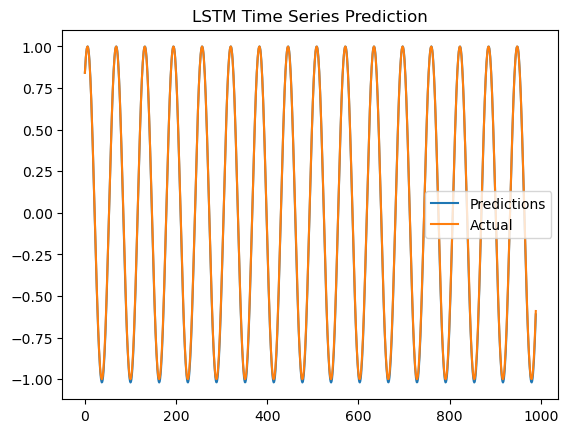

In [3]:
# Generate synthetic sine wave data
time_series = np.sin(np.arange(1000) * 0.1)
time_series = time_series.reshape((-1, 1))

# Parameters for the TimeseriesGenerator
n_input = 10
generator = TimeseriesGenerator(time_series, time_series, length=n_input, batch_size=1)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_input, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(generator, epochs=10)

# Make predictions
predictions = []
for i in range(len(time_series) - n_input):
    x_input = time_series[i:i+n_input].reshape((1, n_input, 1))
    predictions.append(model.predict(x_input, verbose=0))

# Convert predictions to a 1-dimensional array
predictions = np.array(predictions).reshape(-1)

# Compute Mean Absolute Error
mae = mean_absolute_error(time_series[n_input:], predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plot the predictions and the actual data
plt.plot(range(len(predictions)), predictions, label='Predictions')
plt.plot(time_series[n_input:], label='Actual')
plt.legend()
plt.title('LSTM Time Series Prediction')
plt.show()


C:\Users\gardi\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\gardi\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Mean Absolute Error (MAE): 53.3306
Mean Squared Error (MSE): 4853.5154
Root Mean Squared Error (RMSE): 69.6672
R-squared (R²): 0.6881


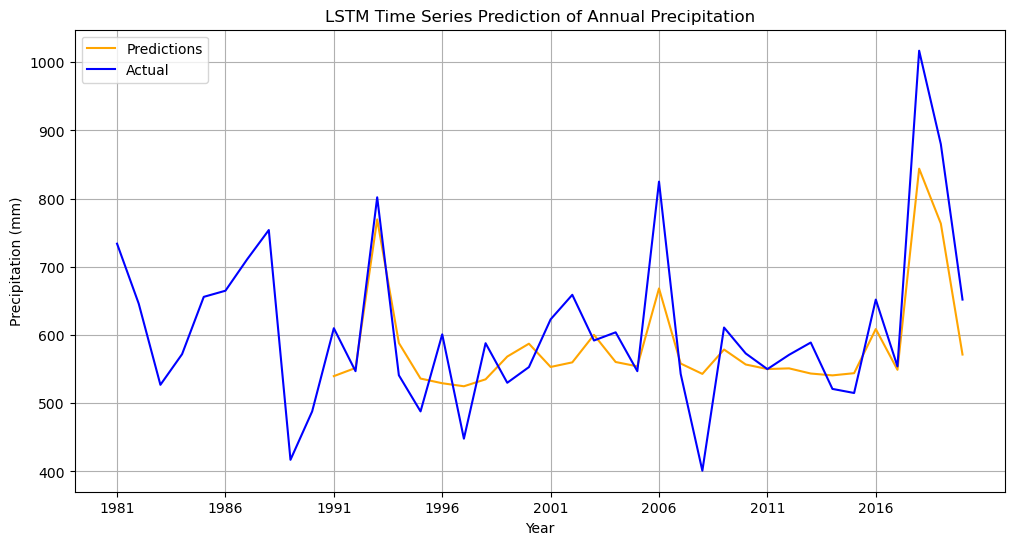

In [11]:
import numpy as np
import tensorflow as tf
from keras.layers import LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Precipitation data for Erbil Governorate from 1981 to 2020
precipitation_data = np.array([
    734, 646, 527, 572, 656, 665, 711, 754, 417, 488, 610, 547, 802, 541, 488, 601, 
    448, 588, 530, 553, 623, 659, 592, 604, 547, 825, 543, 401, 611, 573, 550, 571, 
    589, 521, 515, 652, 554, 1017, 880, 652
]).reshape((-1, 1))

# Normalize the data
scaler = MinMaxScaler()
precipitation_data_scaled = scaler.fit_transform(precipitation_data)

# Parameters for the TimeseriesGenerator
n_input = 10  # Number of previous time steps to use for predicting the next time step
generator = TimeseriesGenerator(precipitation_data_scaled, precipitation_data_scaled, length=n_input, batch_size=1)

# Define the LSTM model with added complexity
model = Sequential([
    LSTM(100, activation='relu', input_shape=(n_input, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(generator, epochs=200, verbose=0)

# Make predictions for the training period
predictions = []
for i in range(len(precipitation_data_scaled) - n_input):
    x_input = precipitation_data_scaled[i:i+n_input].reshape((1, n_input, 1))
    predictions.append(model.predict(x_input, verbose=0))

# Inverse transform predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).reshape(-1)

# Compute accuracy measurements
mae = mean_absolute_error(precipitation_data[n_input:], predictions)
mse = mean_squared_error(precipitation_data[n_input:], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(precipitation_data[n_input:], predictions)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot the predictions and the actual data
plt.figure(figsize=(12, 6))
plt.plot(range(n_input, len(predictions) + n_input), predictions, label='Predictions', color='orange')
plt.plot(range(len(precipitation_data)), precipitation_data, label='Actual', color='blue')
plt.legend()
plt.title('LSTM Time Series Prediction of Annual Precipitation')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.xticks(ticks=range(0, len(precipitation_data), 5), labels=range(1981, 2021, 5))
plt.grid(True)
plt.show()